In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
stopwords_list = 'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Dataset Preparation

In [11]:
data = pd.read_excel('E-commerce.xlsx')
data

,Name,Comment,Tag
0,Monirul Ahmed,"আদৌও কি আমার রিফান্ড পাবো, প্রিয় ই- ভালি?????...",Bad
1,Tanzil Ayon,আপনাদের প্রায়োরিটি স্টোর/ T10 এর আগের পণ্য গু...,Bad
2,HM Athir Al Azad,Order করেছি কিন্তু এখনো নোটিফিকেশন এর মাধ্যমে ...,Bad
3,মোহাম্মদ ইকবাল হোসাইন রুবেল,পেমেন্ট করতে চাইলে নিচের মেসেজ টা শো করছে।আমার...,Neutral
4,DrSheikh Rumi,msung M01s) এটা ৭ দিনের গ্যারান্টেড ডেলিভারির ...,Bad
...,...,...,...
944,Ariful Islam,"শুধু চীন নয়, আরো দেশ থেকে আরো ক্রস বর্ডার পণ্...",Neutral
945,Tahsin Mahmud,আমি দারাজ মূলকে ভালোবাসি কারণ 10% ক্যাশব্যাক +...,Good
946,Aishik Mondal,দারাজমল 100% প্রামাণিক পণ্য ডেলিভারি দে .. আইখ...,Good
947,হিমেল চৌধুরী হিমাদ্রী,"আজ অবধি, আল্লাহর রহমতে আমি দারাজ থেকে যতটা সম্...",Good


In [12]:
data = data.drop(columns=['Name'])
data

,Comment,Tag
0,"আদৌও কি আমার রিফান্ড পাবো, প্রিয় ই- ভালি?????...",Bad
1,আপনাদের প্রায়োরিটি স্টোর/ T10 এর আগের পণ্য গু...,Bad
2,Order করেছি কিন্তু এখনো নোটিফিকেশন এর মাধ্যমে ...,Bad
3,পেমেন্ট করতে চাইলে নিচের মেসেজ টা শো করছে।আমার...,Neutral
4,msung M01s) এটা ৭ দিনের গ্যারান্টেড ডেলিভারির ...,Bad
...,...,...
944,"শুধু চীন নয়, আরো দেশ থেকে আরো ক্রস বর্ডার পণ্...",Neutral
945,আমি দারাজ মূলকে ভালোবাসি কারণ 10% ক্যাশব্যাক +...,Good
946,দারাজমল 100% প্রামাণিক পণ্য ডেলিভারি দে .. আইখ...,Good
947,"আজ অবধি, আল্লাহর রহমতে আমি দারাজ থেকে যতটা সম্...",Good


In [13]:
data.Tag = data.Tag.replace({'Good':'Positive','Bad':'Negative'})

In [14]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Tag=='Positive']),
      "\nTotal Neutral Reviews:",len(data[data.Tag=='Neutral']),
      "\nTotal Negative Reviews:",len(data[data.Tag=='Negative']))

Total Reviews: 949 
Total Positive Reviews: 364 
Total Neutral Reviews: 183 
Total Negative Reviews: 401


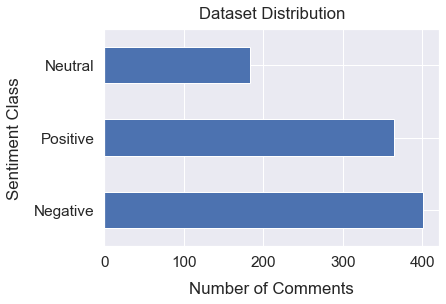

In [15]:
sns.set(font_scale=1.4)
data['Tag'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.title("Dataset Distribution", y=1.02);

In [16]:
# print some unprocessed reviews
sample_data = [10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]
for i in sample_data:
    print(data.Comment[i],'\n','Sentiment:-- ',data.Tag[i],'\n')  

EVL247615915  ভাই Walton কি পন্য ডেলিভারি করে না?????????  Walton কি ব্যাবসা বন্ধ করে দিয়েছে??????? আপনাদের পেইজে শুধু  Jamuna Jamuna Jamuna Jamuna..   Walton কই গেল। পালিয়ে গেছে নাকি???? 
 Sentiment:--  Negative 

EVL850309190 মে এর ১ তারিখের বাটা কার্ডটা এখনো পেলাম না, কেউ ক দেখবেন? 
 Sentiment:--  Negative 

. t10 এর অর্ডার।  ১০% পেমেন্ট করছি কিন্তু পরবর্তী ৯০% পেমেন্ট করতে পারছিনা। অ্যাপ আপডেট করার পরও পেমেন্ট করতে পারতেছি না। এখন কি করব??????? 
 Sentiment:--  Negative 

Invoice: EVL576007949  আপনাদের কি কথার কোনো মূল্য নেই ?? প্রায় ৬ মাস হয়ে গিয়েছে প্রোডাক্টটি পেলাম না ৪৫ কার্যদিবস হওয়ার ১ মাসের ও বেশি সময় পর জানিয়েছেন যে রিফান্ড দেয়া হবে আপনাদের রিফান্ড এর কার্যদিবস ৩০ দিন সেটা ও হয়ে গিয়েছে আমার এখনো এনলিস্টেড ই হয় নি  আর কত সময় লাগবে আপনাদের ?? একটু দ্রুত রিফান্ডটি দিন খুব সমস্যার ভিতরে আছি 
 Sentiment:--  Negative 

আগে আমাদের রিমান্ডের টাকা গুলো দিয়ে দেন, আর কত সময় নিবিন.... 
 Sentiment:--  Negative 

বাকি ৯০% তো প্রোডাক্ট হাতে পেয়ে পরে পে করতে হবে? এখন বলতেছেন আগেই... বুঝলা

## Data Cleaning

In [18]:
def process_comments(comment): 
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) #removing unnecessary punctuation
    return comment

In [19]:
data['cleaned'] = data['Comment'].apply(process_comments)  
sample_data = [10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]
for i in sample_data:
     print('Original:\n',data.Comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Tag[i],'\n')

Original:
 EVL247615915  ভাই Walton কি পন্য ডেলিভারি করে না?????????  Walton কি ব্যাবসা বন্ধ করে দিয়েছে??????? আপনাদের পেইজে শুধু  Jamuna Jamuna Jamuna Jamuna..   Walton কই গেল। পালিয়ে গেছে নাকি???? 
Cleaned:
               ভাই        কি পন্য ডেলিভারি করে না                  কি ব্যাবসা বন্ধ করে দিয়েছে        আপনাদের পেইজে শুধু                                         কই গেল  পালিয়ে গেছে নাকি     
 Sentiment:--  Negative 

Original:
 EVL850309190 মে এর ১ তারিখের বাটা কার্ডটা এখনো পেলাম না, কেউ ক দেখবেন? 
Cleaned:
              মে এর ১ তারিখের বাটা কার্ডটা এখনো পেলাম না  কেউ ক দেখবেন  
 Sentiment:--  Negative 

Original:
 . t10 এর অর্ডার।  ১০% পেমেন্ট করছি কিন্তু পরবর্তী ৯০% পেমেন্ট করতে পারছিনা। অ্যাপ আপডেট করার পরও পেমেন্ট করতে পারতেছি না। এখন কি করব??????? 
Cleaned:
       এর অর্ডার   ১০  পেমেন্ট করছি কিন্তু পরবর্তী ৯০  পেমেন্ট করতে পারছিনা  অ্যাপ আপডেট করার পরও পেমেন্ট করতে পারতেছি না  এখন কি করব        
 Sentiment:--  Negative 

Original:
 Invoice: EVL576007949  আপনাদের কি কথার কোনো 

## Remove Low lenght data

In [20]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 97 Small Reviews 
Total Reviews: 852


## Dataset Summary

In [21]:
def data_summary(dataset):
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Tag.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Tag==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Tag==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Tag==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)    



Class Name :  Negative
Number of Documents:391
Number of Words:8227
Number of Unique Words:1732
Most Frequent Words:

না	218
অর্ডার	127
করে	117
ডেলিভারি	99
কি	93
নাই	89
আর	84
দিন	84
আমি	84
রিফান্ড	83

Class Name :  Positive
Number of Documents:303
Number of Words:3276
Number of Unique Words:648
Most Frequent Words:

দারাজ	102
আমি	92
সাথে	52
রিটার্ন	50
এ	50
কোন	49
এটা	49
ডেলিভারি	47
ভালো	46
ইভ্যালি	45

Class Name :  Neutral
Number of Documents:157
Number of Words:1937
Number of Unique Words:841
Most Frequent Words:

কি	46
থেকে	24
করে	23
না	23
আমার	21
পেমেন্ট	20
এই	18
অর্ডার	18
দারাজ	17
করতে	16
Total Number of Unique Words:2522


## Dataset Summary Visualization

In [60]:
data_matrix = pd.DataFrame({'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(df)

  Class Names      Category  Values
0    Negative   Total Words    8227
1    Positive   Total Words    3276
2     Neutral   Total Words    1937
3    Negative  Unique Words    1732
4    Positive  Unique Words     648
5     Neutral  Unique Words     841


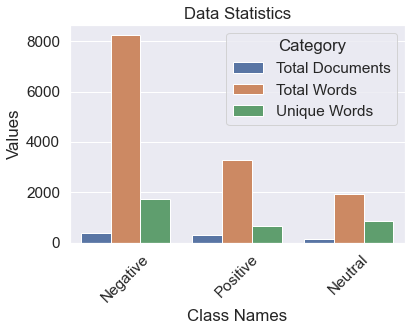

In [22]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

## Comment Lenght Distribution

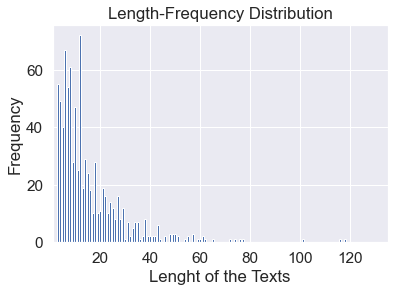

Maximum Length of a review: 190
Minimum Length of a review: 3
Average Length of a reviews: 16.0


In [23]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

# Take only Positive and Negative Class for Model Building

In [24]:
positive = dataset[dataset.Tag == 'Positive']
negative = dataset[dataset.Tag == 'Negative']
dataset = positive.append(negative,ignore_index=True)
dataset.Tag.value_counts()

Negative    391
Positive    303
Name: Tag, dtype: int64

## Lable Encoding and Dataset Splitting

In [25]:
def label_encoding(sentiment,bool):
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

def dataset_split(feature_space,sentiment):
    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.2,random_state =2)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [26]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

# **Model Building Using Machine Learning**

## Feature Extraction Using TF-IDF

In [27]:
def calc_gram_tfidf(reviews,gram):
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    return tfidf,X

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [81]:
def ml_models_defination(): 
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    return ml_models,model_names 

In [82]:
def model_performace(model,X_train,X_test,y_train,y_test):
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    return my_dict  

In [83]:
def performance_table(performance_dict):
    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df      

## Model Training

In [84]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,2), (1,3), (1,4)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Tag,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open( f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 7877

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 694 
	Training		 555 
	Test			 139
Feature Size :======> 14091

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 694 
	Training		 555 
	Test			 139
Feature Size :======> 20036

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 694 
	Training		 555 
	Test			 139


## Performance Table

In [85]:
# Load all the json files
gram_names = ['Unigram', 'Bigram', 'Trigram']

for gram in gram_names:
  accuracy = json.load(open(f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  #print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     87.05      95.92   74.60     83.93          LR
1     87.05      83.58   88.89     86.15          DT
2     90.65      94.64   84.13     89.08          RF
3     88.49      82.19   95.24     88.24         MNB
4     87.05      82.61   90.48     86.36         KNN
5     84.17      95.56   68.25     79.63  Linear SVM
6     86.33      95.83   73.02     82.88     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by RF at = 90.64999999999999
Highest F1-Score achieved by RF at = 89.08
Highest Precision Score achieved by LR at = 95.92

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     87.05      95.92   74.60     83.93          LR
1     88.49      85.07   90.48     87.69          DT
2     87.77      94.23   77.78     85.22          RF
3     84.89      76.25   96.83     85.31         MNB


**Conclusion:**

***From this performance table it can be said that the Bigram feature combination with KNN classifier provides highest accuray and F1-score value.***

## Performance Visualization

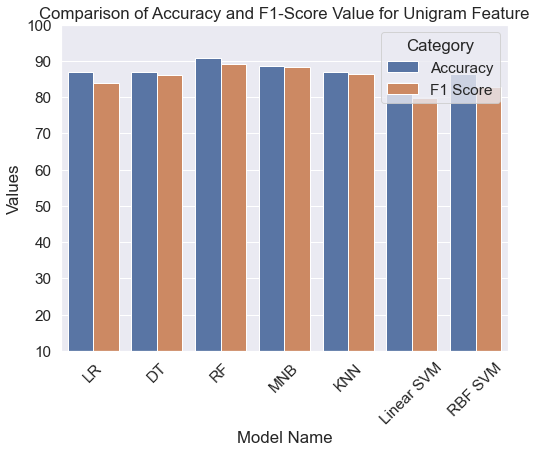

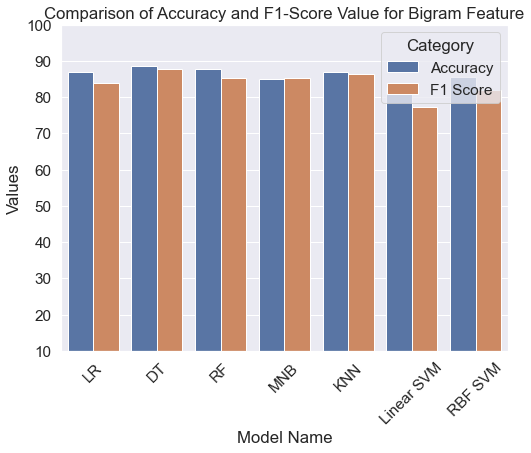

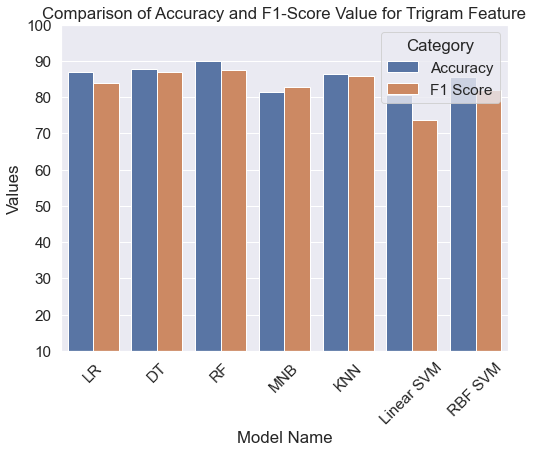

In [86]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,100])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);